In [122]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


In [123]:
df = pd.read_csv('air-quality-india.csv')
display(df.head(25))
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Print the updated DataFrame
df.head(25)

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
5,2017-11-07 17:00:00,2017,11,7,17,124.21
6,2017-11-07 18:00:00,2017,11,7,18,123.45
7,2017-11-07 19:00:00,2017,11,7,19,120.31
8,2017-11-07 20:00:00,2017,11,7,20,108.75
9,2017-11-07 21:00:00,2017,11,7,21,97.80


,Year,Month,Day,Hour,PM2.5
Timestamp,,,,,
2017-11-07 12:00:00,2017,11,7,12,64.51
2017-11-07 13:00:00,2017,11,7,13,69.95
2017-11-07 14:00:00,2017,11,7,14,92.79
2017-11-07 15:00:00,2017,11,7,15,109.66
2017-11-07 16:00:00,2017,11,7,16,116.50
2017-11-07 17:00:00,2017,11,7,17,124.21
2017-11-07 18:00:00,2017,11,7,18,123.45
2017-11-07 19:00:00,2017,11,7,19,120.31
2017-11-07 20:00:00,2017,11,7,20,108.75


In [124]:
import pandas as pd

def get_train_test_generic(for_prophet=False, freq=None):
    df = pd.read_csv('air-quality-india.csv')

    df.index = pd.to_datetime(df['Timestamp'])
    df.drop(columns='Timestamp', inplace=True)
    df.sort_index(inplace=True)
    
    if freq is not None:
        df = df[['PM2.5']].resample(freq).mean()
    
    train_len = int(0.8 * len(df))
    train_df = df.iloc[:train_len].copy()
    test_df = df.iloc[train_len:].copy()
    
    if for_prophet:
        train_df = convert_to_prophet(train_df)
        test_df = convert_to_prophet(test_df)
    
    return train_df, test_df, df
tr_df, ts_df, df = get_train_test_generic(freq='1D')
df.isnull().sum()


PM2.5    55
dtype: int64

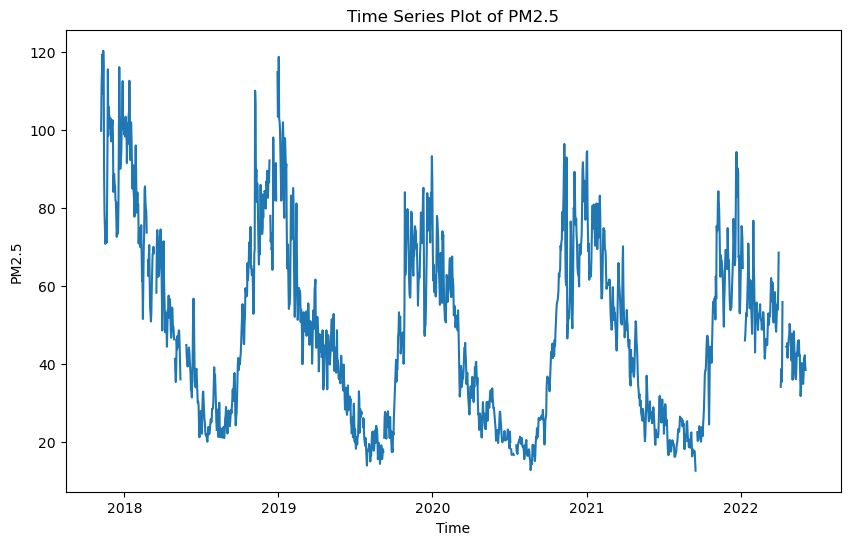

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches by 6 inches
plt.plot(df['PM2.5'])  # Assuming 'PM2.5' is the column name in the DataFrame 'df'
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Time Series Plot of PM2.5')
plt.show()


In [126]:
df.isnull().sum()

PM2.5    55
dtype: int64

In [127]:
df = df.dropna()
df.shape

(1616, 1)

In [128]:
from scipy.stats import zscore

# Calculate Z-scores
df['Z-score'] = zscore(df['PM2.5'])

# Define the Z-score threshold for outlier detection
threshold = 3

# Create a mask to identify outliers
mask = np.abs(df['Z-score']) > threshold

# Remove outliers
df_no_outliers = df.loc[~mask]

# Display the shape of the DataFrame without outliers
print("Shape of DataFrame without outliers:", df_no_outliers.shape)

# Display the DataFrame without outliers
print(df_no_outliers)
df.shape

Shape of DataFrame without outliers: (1613, 2)
                 PM2.5   Z-score
Timestamp                       
2017-11-07   99.805833  2.187650
2017-11-08  110.979565  2.667062
2017-11-09  114.915833  2.835948
2017-11-11  109.267273  2.593595
2017-11-13  117.146667  2.931663
...                ...       ...
2022-05-31   41.465417 -0.315462
2022-06-01   41.645833 -0.307721
2022-06-02   42.255417 -0.281566
2022-06-03   39.425417 -0.402988
2022-06-04   38.503750 -0.442533

[1613 rows x 2 columns]


(1616, 2)

In [129]:
# Multiplicative decomposition
mul_result = seasonal_decompose(df['PM2.5'], model = 'multiplicative', period=1)

#Additive Decomposition
add_result = seasonal_decompose(df['PM2.5'], model = 'additive', period=1)


Text(0.5, 0.98, '\nMultiplicative decompose')

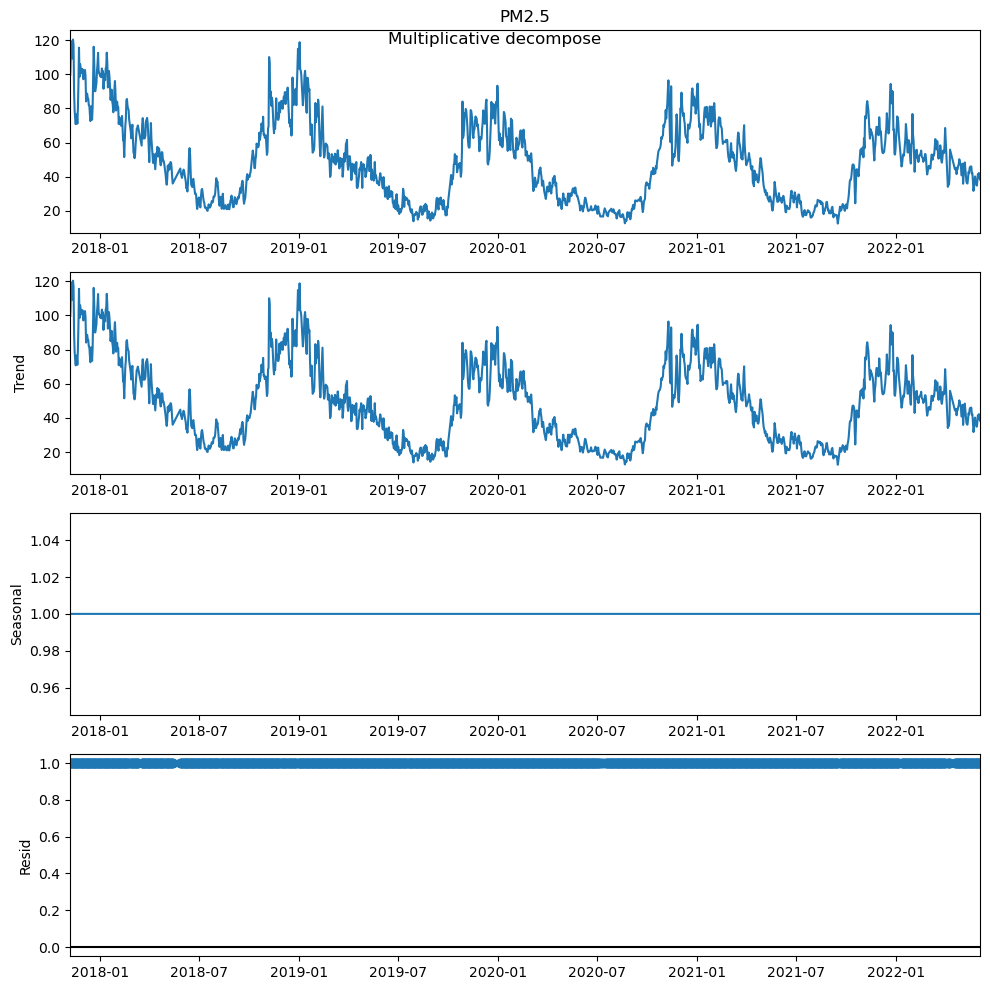

In [130]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle("\nMultiplicative decompose", fontsize = 12)

Text(0.5, 0.98, '\nAdditive decompose')

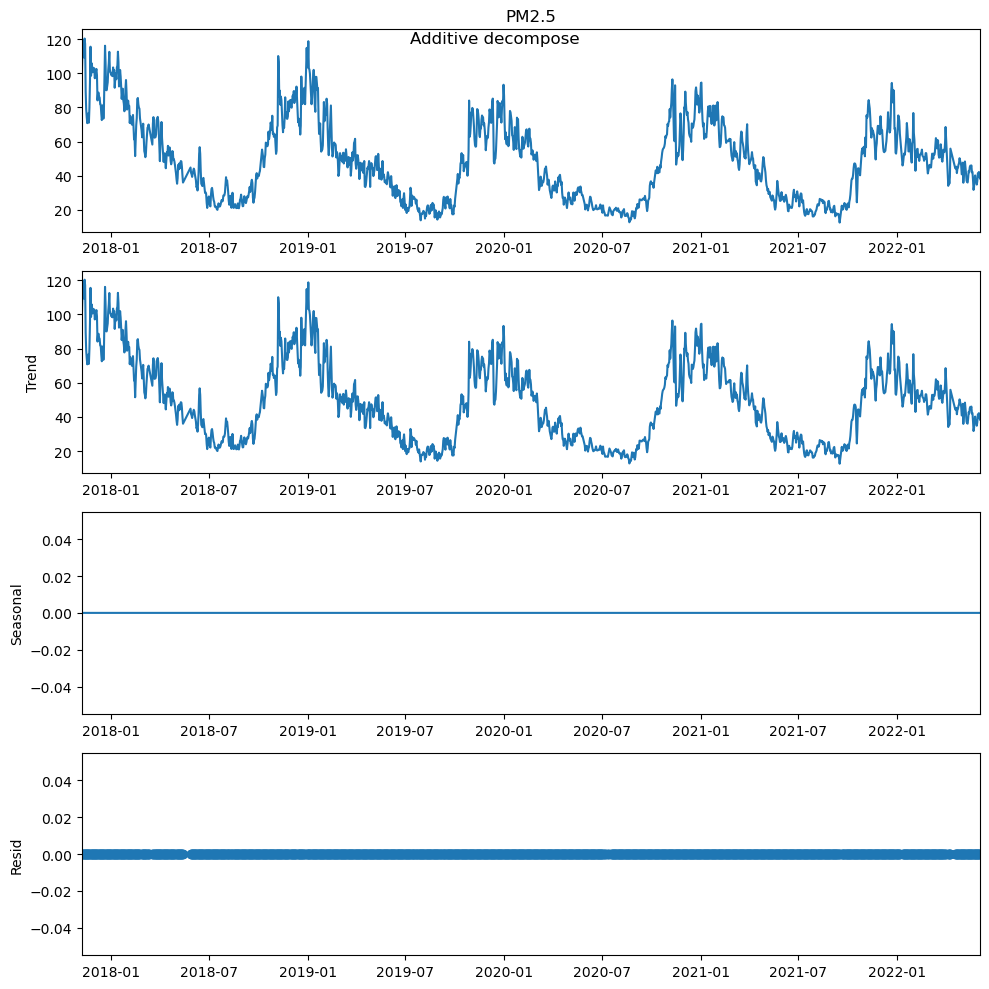

In [131]:
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle("\nAdditive decompose", fontsize = 12)

# Test for stationarity 

## ADFuller test

In [132]:
from statsmodels.tsa.stattools import adfuller

In [133]:
import numpy as np

df['logPM2.5'] = np.log(df['PM2.5'])
df['sqrtPM2.5'] = np.sqrt(df['PM2.5'])

In [134]:

# Assuming 'df' is your DataFrame with the daily data
df['Seasonal shift difference'] = df['PM2.5']-df['PM2.5'].shift(30)




In [135]:
adfuller_result = adfuller(df['Seasonal shift difference'].dropna(), autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')


ADF Statistic: -4.445003096002393
p-value: 0.00024688128767727806


<Axes: xlabel='Timestamp'>

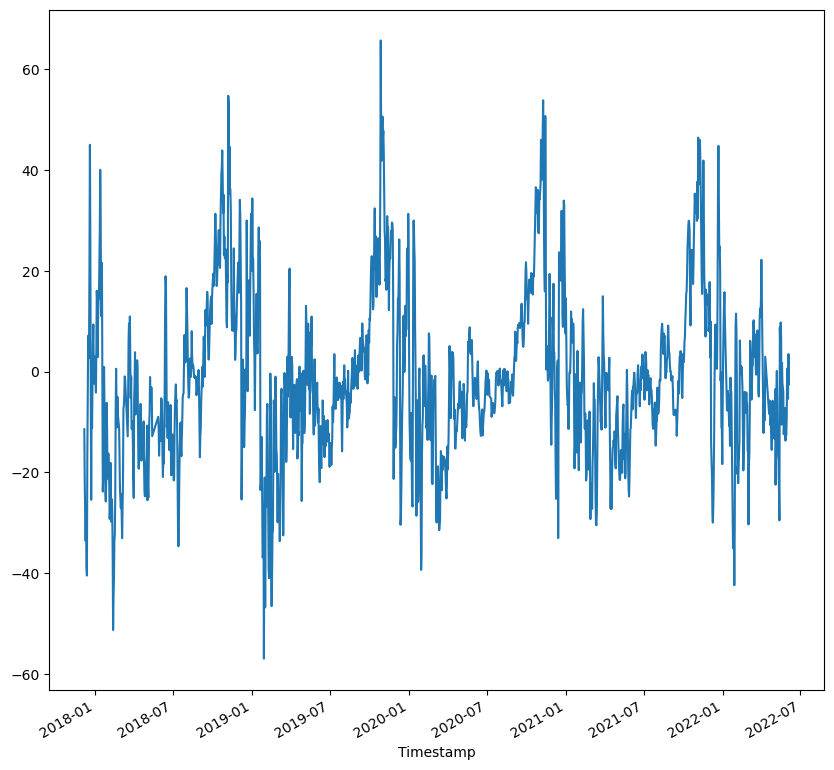

In [136]:
df['Seasonal shift difference'].plot()

### Therefore from ADF test we conclude that the data is stationary

In [137]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [138]:
stepwise_fit = auto_arima(df['Seasonal shift difference'].dropna(), trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10713.753, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13395.324, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10783.653, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11972.172, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13400.072, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10741.024, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10745.498, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10715.816, Time=1.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=10715.753, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10752.512, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=10737.454, Time=0.59 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10716.153, Time=1.08 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10711.983, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1586
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5350.992
Date:                Tue, 30 May 2023   AIC                          10711.983
Time:                        21:55:03   BIC                          10738.828
Sample:                             0   HQIC                         10721.956
                               - 1586                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6184      0.045     35.604      0.000       1.529       1.707
ar.L2         -0.6275      0.043    -14.684      0.000      -0.711      -0.544
ma.L1         -0.6115      0.044    -13.966      0.000      -0.697      -0.526
ma.L2         -0.2364      0.020    -11.912      0.000      -0.275      -0.198
sigma2        49.8356      0.964     51.711      0.000      47.947      51.725
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1630.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
import statsmodels.api as sm


In [140]:
print(df.shape)
train = df.iloc[:-60]
test = df.iloc[-60:]

(1616, 5)


### Training arima model

In [142]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is your DataFrame with the 'PM2.5' column

# Fit the ARIMA model
model = sm.tsa.statespace.SARIMAX(df['PM2.5'], order=(2,0,2),seasonal_order=(2,0,2,30))
model_fit = model.fit()

# Get the model summary
model_summary = model_fit.summary()

# Print the summary
print(model_summary)


                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                 1616
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 30)   Log Likelihood               -4937.215
Date:                            Tue, 30 May 2023   AIC                           9892.430
Time:                                    21:56:42   BIC                           9940.920
Sample:                                         0   HQIC                          9910.427
                                           - 1616                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6431      0.038     42.723      0.000       1.568       1.719
ar.L2         -0.6444      0.038   

<Axes: xlabel='Timestamp'>

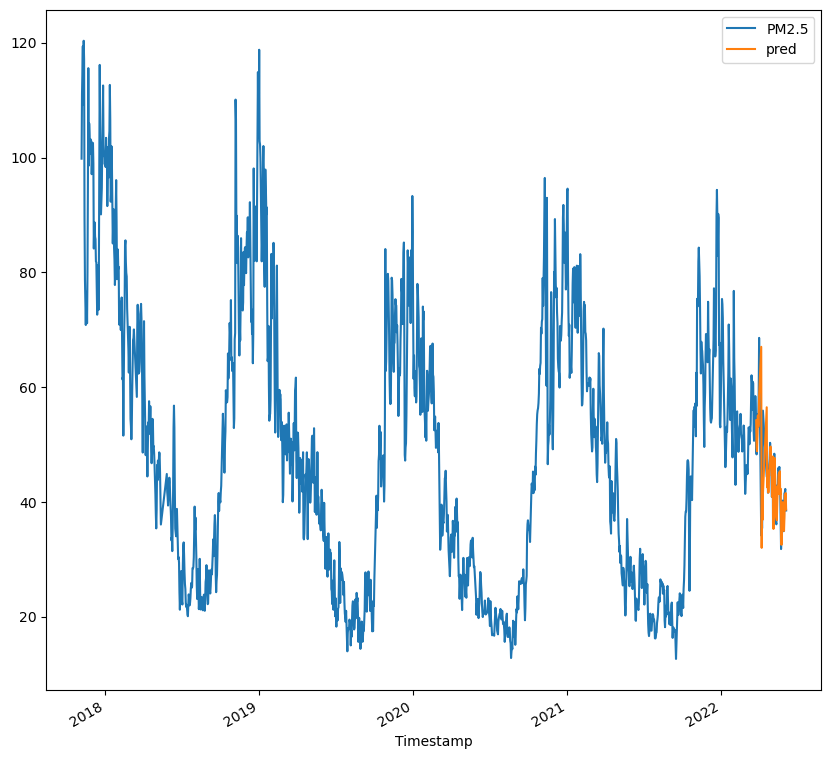

In [143]:

# Set the start and end indices for prediction
start = len(train)
end = len(train) + len(test) - 1

# Make predictions using the fitted model and estimated parameters
df['pred'] = model_fit.predict(start=start, end=end, typ='levels')
df[['PM2.5','pred']].plot()



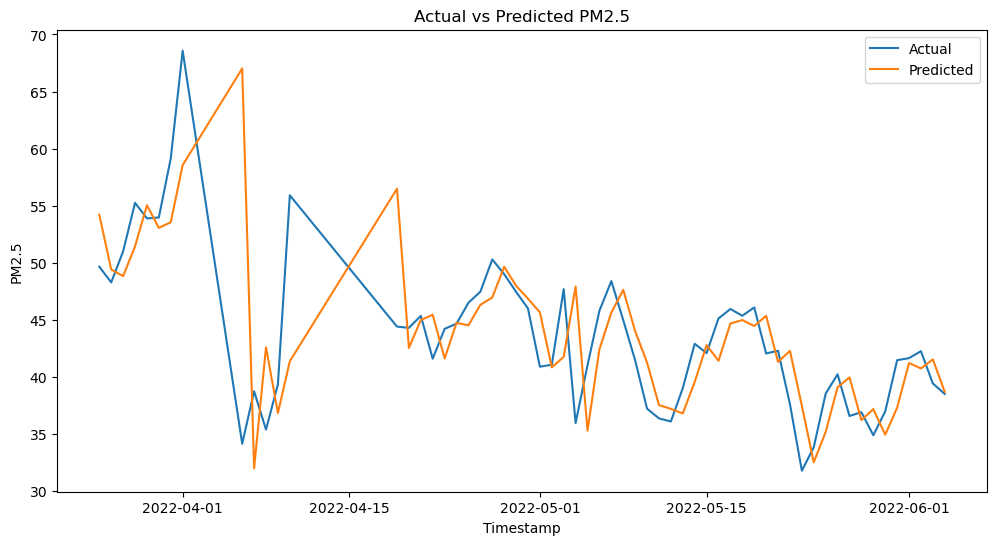

In [144]:
import matplotlib.pyplot as plt

# Set the start and end indices for prediction
start = len(train)
end = len(train) + len(test) - 1

# Make predictions using the fitted model and estimated parameters
df['pred'] = model_fit.predict(start=start, end=end, typ='levels')

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[start:end+1], df['PM2.5'][start:end+1], label='Actual')
plt.plot(df.index[start:end+1], df['pred'][start:end+1], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.legend()
plt.show()


In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate mean squared error (MSE)
mse = mean_squared_error(df['PM2.5'][start:end+1], df['pred'][start:end+1])

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(df['PM2.5'][start:end+1], df['pred'][start:end+1], squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(df['PM2.5'][start:end+1], df['pred'][start:end+1])

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)


Mean Squared Error (MSE): 36.760474672126406
Root Mean Squared Error (RMSE): 6.063041701334933
Mean Absolute Error (MAE): 3.653521707467198


In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the start and end indices for prediction
start = len(train)
end = len(train) + len(test) - 1

# Calculate mean squared error (MSE)
mse = mean_squared_error(df['PM2.5'][start:end+1], df['pred'][start:end+1])

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(df['PM2.5'][start:end+1], df['pred'][start:end+1], squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(df['PM2.5'][start:end+1], df['pred'][start:end+1])

# Calculate R2 score
r2 = r2_score(df['PM2.5'][start:end+1], df['pred'][start:end+1])

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R2 Score:', r2)


Mean Squared Error (MSE): 36.760474672126406
Root Mean Squared Error (RMSE): 6.063041701334933
Mean Absolute Error (MAE): 3.653521707467198
R2 Score: 0.1844366641143942


# LSTM

In [25]:
import pandas as pd

df = pd.read_csv('air-quality-india.csv')


In [26]:
import pandas as pd

def get_train_test_generic(for_prophet=False, freq=None):
    df = pd.read_csv('air-quality-india.csv')

    df.index = pd.to_datetime(df['Timestamp'])
    df.drop(columns='Timestamp', inplace=True)
    df.sort_index(inplace=True)
    
    if freq is not None:
        df = df[['PM2.5']].resample(freq).mean()
    
    train_len = int(0.8 * len(df))
    train_df = df.iloc[:train_len].copy()
    test_df = df.iloc[train_len:].copy()
    
    if for_prophet:
        train_df = convert_to_prophet(train_df)
        test_df = convert_to_prophet(test_df)
    
    return train_df, test_df, df
tr_df, ts_df, df = get_train_test_generic(freq='1D')


In [27]:
df = df.sort_values(by='Timestamp')

In [28]:
df.shape

(1671, 1)

In [29]:
df['PM2.5_1day'] = df['PM2.5'].shift(+1)
df['PM2.5_2day'] = df['PM2.5'].shift(+2)
df['PM2.5_3day'] = df['PM2.5'].shift(+3)

In [30]:
df.head()

,PM2.5,PM2.5_1day,PM2.5_2day,PM2.5_3day
Timestamp,,,,
2017-11-07,99.805833,NaN,NaN,NaN
2017-11-08,110.979565,99.805833,NaN,NaN
2017-11-09,114.915833,110.979565,99.805833,NaN
2017-11-10,119.404091,114.915833,110.979565,99.805833
2017-11-11,109.267273,119.404091,114.915833,110.979565


In [31]:
df = df.dropna()
df

,PM2.5,PM2.5_1day,PM2.5_2day,PM2.5_3day
Timestamp,,,,
2017-11-10,119.404091,114.915833,110.979565,99.805833
2017-11-11,109.267273,119.404091,114.915833,110.979565
2017-11-12,120.354000,109.267273,119.404091,114.915833
2017-11-13,117.146667,120.354000,109.267273,119.404091
2017-11-14,89.475000,117.146667,120.354000,109.267273
...,...,...,...,...
2022-05-31,41.465417,36.977917,34.892083,36.912500
2022-06-01,41.645833,41.465417,36.977917,34.892083
2022-06-02,42.255417,41.645833,41.465417,36.977917


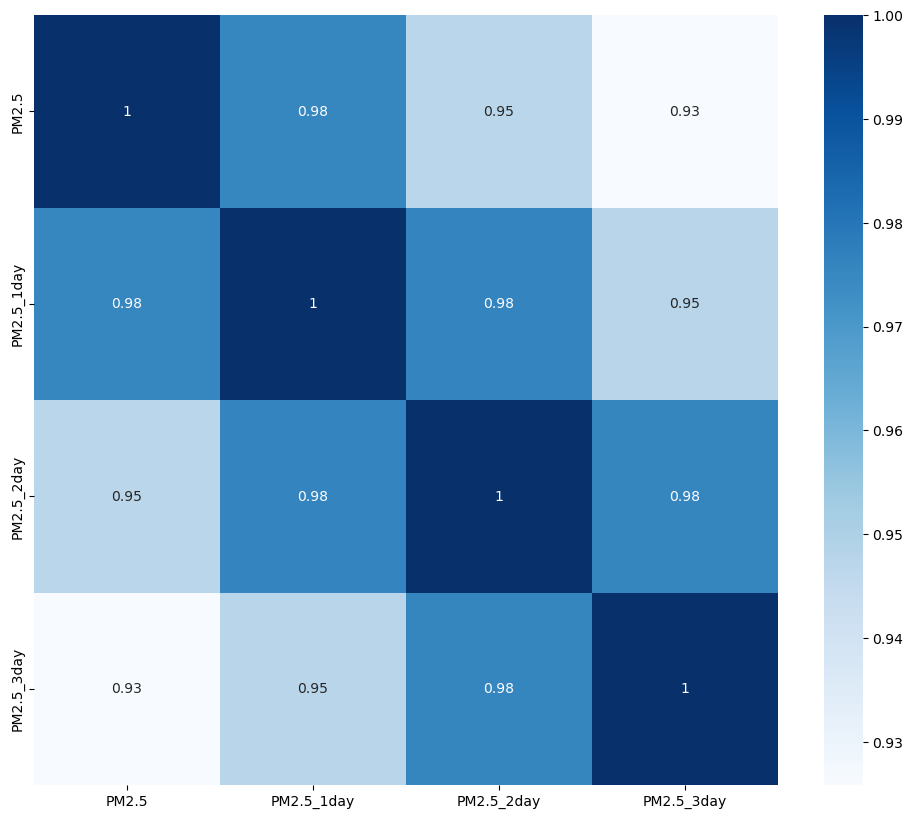

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_corr = df[[i for i in df.columns]]

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor
randomF_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [35]:
import numpy as np

x1 = df['PM2.5_1day'].values.reshape(-1, 1)
x2 = df['PM2.5_2day'].values.reshape(-1, 1)
x3 = df['PM2.5_3day'].values.reshape(-1, 1)
y = df['PM2.5'].values.reshape(-1, 1)

final_x = np.concatenate((x1, x2, x3), axis=1)


In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_x, y, test_size=0.05, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (1484, 3) (1484, 1)
Test set shape: (79, 3) (79, 1)


In [37]:
lin_model.fit(X_train,y_train)
randomF_model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

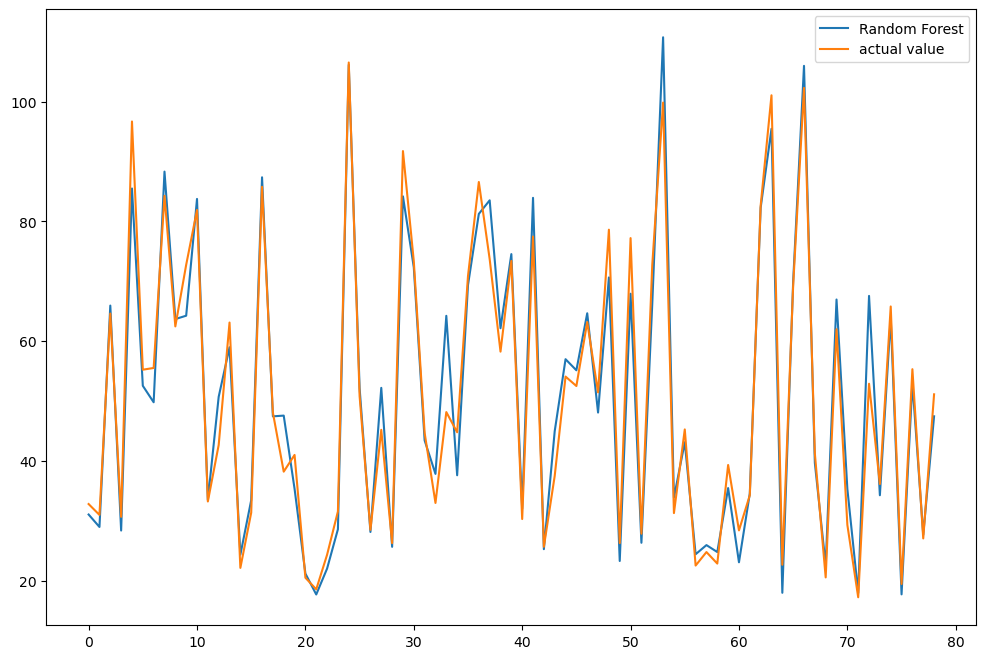

In [38]:
rand_pred = randomF_model.predict(X_test)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(rand_pred, label='Random Forest')
plt.plot(y_test,label='actual value')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import r2_score

# Calculate R2 score for Random Forest model
randomF_r2 = r2_score(y_test, rand_pred)

# Print the R2 score
print("R2 Score - Random Forest:", randomF_r2)


R2 Score - Random Forest: 0.9561295269741885


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, rand_pred))

# Calculate MSE
mse = mean_squared_error(y_test, rand_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, rand_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 5.008478638668337
Mean Squared Error (MSE): 25.084858273997042
Mean Absolute Error (MAE): 3.7234470721762065


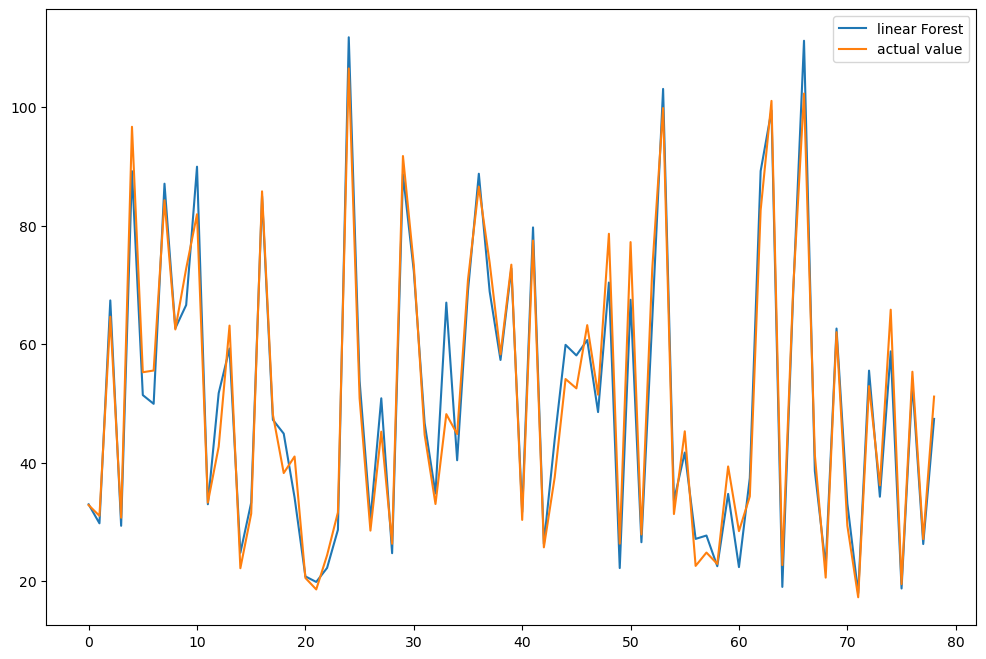

In [41]:
pred = lin_model.predict(X_test)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(pred, label='linear Forest')
plt.plot(y_test,label='actual value')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import r2_score

# Calculate R2 score for Random Forest model
linear_r2 = r2_score(y_test, pred)

# Print the R2 score
print("R2 Score - linear regression:", linear_r2)


n = len(y_test)  # number of samples
k = X_test.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - linear_r2) * (n - 1) / (n - k - 1)

# Print the adjusted R2 score
print("Adjusted R2 Score - Random Forest:", adjusted_r2)


R2 Score - linear regression: 0.9625955227041202
Adjusted R2 Score - Random Forest: 0.961099343612285


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))

# Calculate MSE
mse = mean_squared_error(y_test, pred)

# Calculate MAE
mae = mean_absolute_error(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 4.624677601668464
Mean Squared Error (MSE): 21.38764291937397
Mean Absolute Error (MAE): 3.519707536729797


In [44]:
from sklearn.linear_model import Lasso, Ridge

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as per your needs
lasso_model.fit(X_train, y_train)

# Fit Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value as per your needs
ridge_model.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics for Lasso model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Calculate metrics for Ridge model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Print the metrics
print("Lasso Model:")
print("RMSE:", lasso_rmse)
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print()
print("Ridge Model:")
print("RMSE:", ridge_rmse)
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)


Lasso Model:
RMSE: 4.6254423667642435
MSE: 21.394717088257604
MAE: 3.517568328617715

Ridge Model:
RMSE: 4.624678295978866
MSE: 21.387649341297987
MAE: 3.519707108256332


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [47]:
# Predict on the test data
gb_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Print the evaluation metrics
print("Gradient Boosting Regression Metrics:")
print("RMSE:", gb_rmse)
print("MSE:", gb_mse)
print("MAE:", gb_mae)


Gradient Boosting Regression Metrics:
RMSE: 4.962897876091309
MSE: 24.630355328511627
MAE: 3.619016718368123


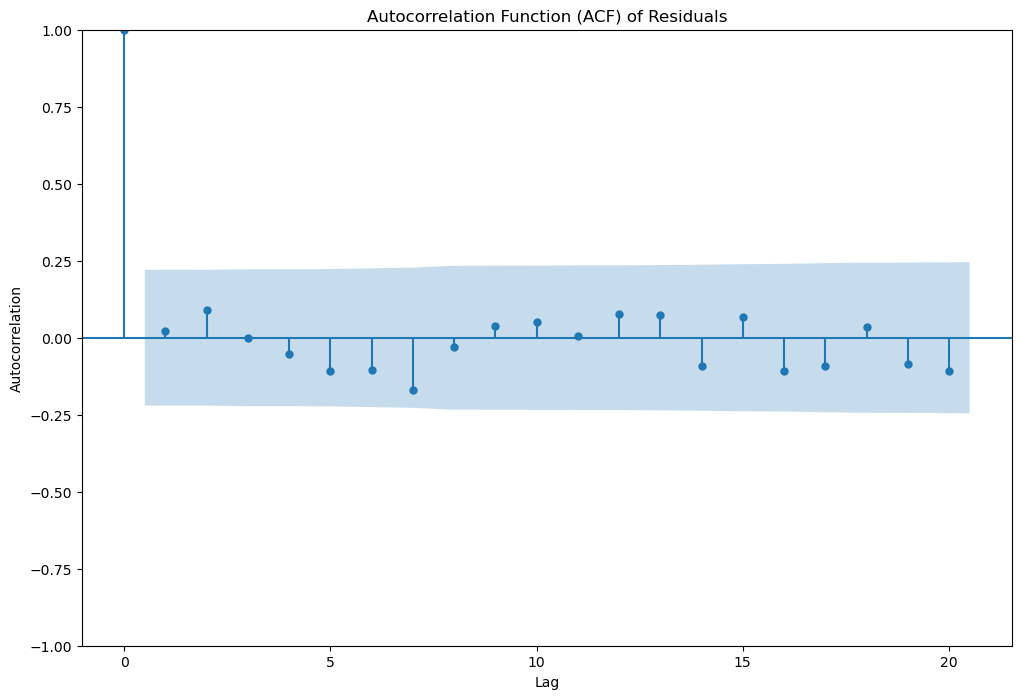

In [48]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the residuals
residuals = y_test - pred

# Plot the ACF
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


In [101]:
from sklearn.svm import SVR

# Create an SVR model with different kernels
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_rbf = SVR(kernel='rbf')

# Fit the SVR models to the training data
svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)


SVR()

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict using the SVR models
svr_linear_pred = svr_linear.predict(X_test)
svr_poly_pred = svr_poly.predict(X_test)
svr_rbf_pred = svr_rbf.predict(X_test)

# Calculate the MSE for SVR models
svr_linear_mse = mean_squared_error(y_test, svr_linear_pred)
svr_poly_mse = mean_squared_error(y_test, svr_poly_pred)
svr_rbf_mse = mean_squared_error(y_test, svr_rbf_pred)

# Calculate the RMSE for SVR models
svr_linear_rmse = np.sqrt(svr_linear_mse)
svr_poly_rmse = np.sqrt(svr_poly_mse)
svr_rbf_rmse = np.sqrt(svr_rbf_mse)

# Calculate the MAE for SVR models
svr_linear_mae = mean_absolute_error(y_test, svr_linear_pred)
svr_poly_mae = mean_absolute_error(y_test, svr_poly_pred)
svr_rbf_mae = mean_absolute_error(y_test, svr_rbf_pred)

# Calculate the R2 score for SVR models
svr_linear_r2 = r2_score(y_test, svr_linear_pred)
svr_poly_r2 = r2_score(y_test, svr_poly_pred)
svr_rbf_r2 = r2_score(y_test, svr_rbf_pred)


In [103]:
print("SVR (Linear Kernel):")
print("MSE:", svr_linear_mse)
print("RMSE:", svr_linear_rmse)
print("MAE:", svr_linear_mae)
print("R2 Score:", svr_linear_r2)
print()

print("SVR (Polynomial Kernel):")
print("MSE:", svr_poly_mse)
print("RMSE:", svr_poly_rmse)
print("MAE:", svr_poly_mae)
print("R2 Score:", svr_poly_r2)
print()

print("SVR (RBF Kernel):")
print("MSE:", svr_rbf_mse)
print("RMSE:", svr_rbf_rmse)
print("MAE:", svr_rbf_mae)
print("R2 Score:", svr_rbf_r2)


SVR (Linear Kernel):
MSE: 21.566708649609502
RMSE: 4.643997055297247
MAE: 3.546894919243683
R2 Score: 0.9622823577580664

SVR (Polynomial Kernel):
MSE: 189.97236293323348
RMSE: 13.783046213853941
MAE: 9.474857967021917
R2 Score: 0.6677606334195916

SVR (RBF Kernel):
MSE: 27.914831193408002
RMSE: 5.283448797273236
MAE: 3.876595294849233
R2 Score: 0.9511802364791534


In [115]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Score (MSE): 25.346431373718268


In [116]:
# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the R2 score
r2_score = best_model.score(X_test, y_test)

# Print the R2 score
print("R2 Score:", r2_score)


R2 Score: 0.966196271235407


In [117]:
# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the R2 score
r2_score = best_model.score(X_test, y_test)

# Print the R2 score
print("R2 Score:", r2_score)


R2 Score: 0.966196271235407


In [118]:
# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the RMSE
print("RMSE:", rmse)


RMSE: 4.396448310071498


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the Linear Regression model
linreg_model = LinearRegression()

# Fit the model to the training data
linreg_model.fit(X_train, y_train)

# Make predictions on the test data
linreg_predictions = linreg_model.predict(X_test)

# Calculate the R2 score
linreg_r2 = r2_score(y_test, linreg_predictions)

# Calculate the RMSE
linreg_mse = mean_squared_error(y_test, linreg_predictions)
linreg_rmse = np.sqrt(linreg_mse)

# Print the R2 score and RMSE
print("Linear Regression R2 Score:", linreg_r2)
print("Linear Regression RMSE:", linreg_rmse)


Linear Regression R2 Score: 0.9625955227041202
Linear Regression RMSE: 4.624677601668464
